In [1]:
from dstaster import *

In [2]:
# Load data
ratio_model = pd.read_csv('../tate/ratio_model.csv', index_col=0).rename(columns={"model": "ratio_model"})
title_model = pd.read_csv('../tate/title_model.csv', index_col=0).rename(columns={"model": "title_model"})
collection = pd.read_csv("../tate/paintings.csv", index_col=0)
collection = collection.join(ratio_model).join(title_model)

collection['title'] = collection['title'].str.lower()

collection

,artist,title,year,groundtruth,height,width,ratio_model,title_model
T13896,John Constable,salisbury cathedral from the meadows,1831,L,1537,1920,O,O
T05010,Pablo Picasso,weeping woman,1937,O,608,500,P,P
N05915,Pablo Picasso,bust of a woman,1909,P,727,600,P,P
N00530,Joseph Mallord William Turner,snow storm - steam-boat off a harbour’s mouth,1842,L,914,1219,L,L
T00598,Richard Dadd,the fairy feller’s master-stroke,1855,O,540,394,P,O
...,...,...,...,...,...,...,...,...
N05609,Maurice Sterne,mexican church interior,1934,O,1283,1022,P,L
T14823,Unknown artist,leon trotsky,1980,P,510,480,O,O
AL00397,Louise Bourgeois,untitled,1946,O,660,1116,L,O
T14824,Unknown artist,leon trotsky,1980,P,638,511,P,O


In [3]:
stop_words = {'the', 'and', 'with', 'from', 'for', 'untitled', 'of', 'in', 'at', 'on', 'a', 'an', 'st', 'to', 'by'}
    
port_words = {'portrait', 'nude', 'bust', 'self-portrait', 'figure',
                'gentleman', 'mr', 'lord', 'count', 'sir', 'man', 'boy', 
                'dr', 'colonel',
                'mrs', 'miss', 'lady', 'dame', 'countess', 'duchess', 'woman', 'women', 'girl', 
                'husband', 'wife', 'father', 'mother', 'son', 'daughter', 'family',
                'brother', 'sister', 'child'}
land_words = {'view', 'landscape', 'house', 'church', 'mill',
              'church', 'cathedral', 'castle', 
              'bridge', 'river', 'lake', 'canal', 'channel', 'pier', 'harbour', 'thames',
              'boat', 'ship', 'beach', 'sea', 'bay', 'coast', 'cliff',
              'tree', 'flower', 'forest', 'wood', 'garden', 'park', 'meadow', 'field', 'farm',
              'mountain', 'hill', 
              'morning', 'evening', 'sunset', 'sunrise',
              'winter', 'summer', 'autumn', 'spring'}

In [4]:
other = collection[collection['groundtruth'] == 'O']
counts = other['title'].str.split(expand=True).stack().value_counts()

counts[~counts.index.isin(stop_words|port_words|land_words)][:20]

life           23
still          22
his            17
no.            12
painting       11
two            10
interior       10
death          10
scene           9
‘the            9
day             9
blue            9
composition     8
ii              7
sketch          7
figures         7
study           7
horse           7
last            6
venice          6
dtype: int64

<div style="color: #f00">Idea: Let students define a few words to improve classifier. The following shows common words in portrait/landscape titles
    that are misclassified as 'Other'</div>

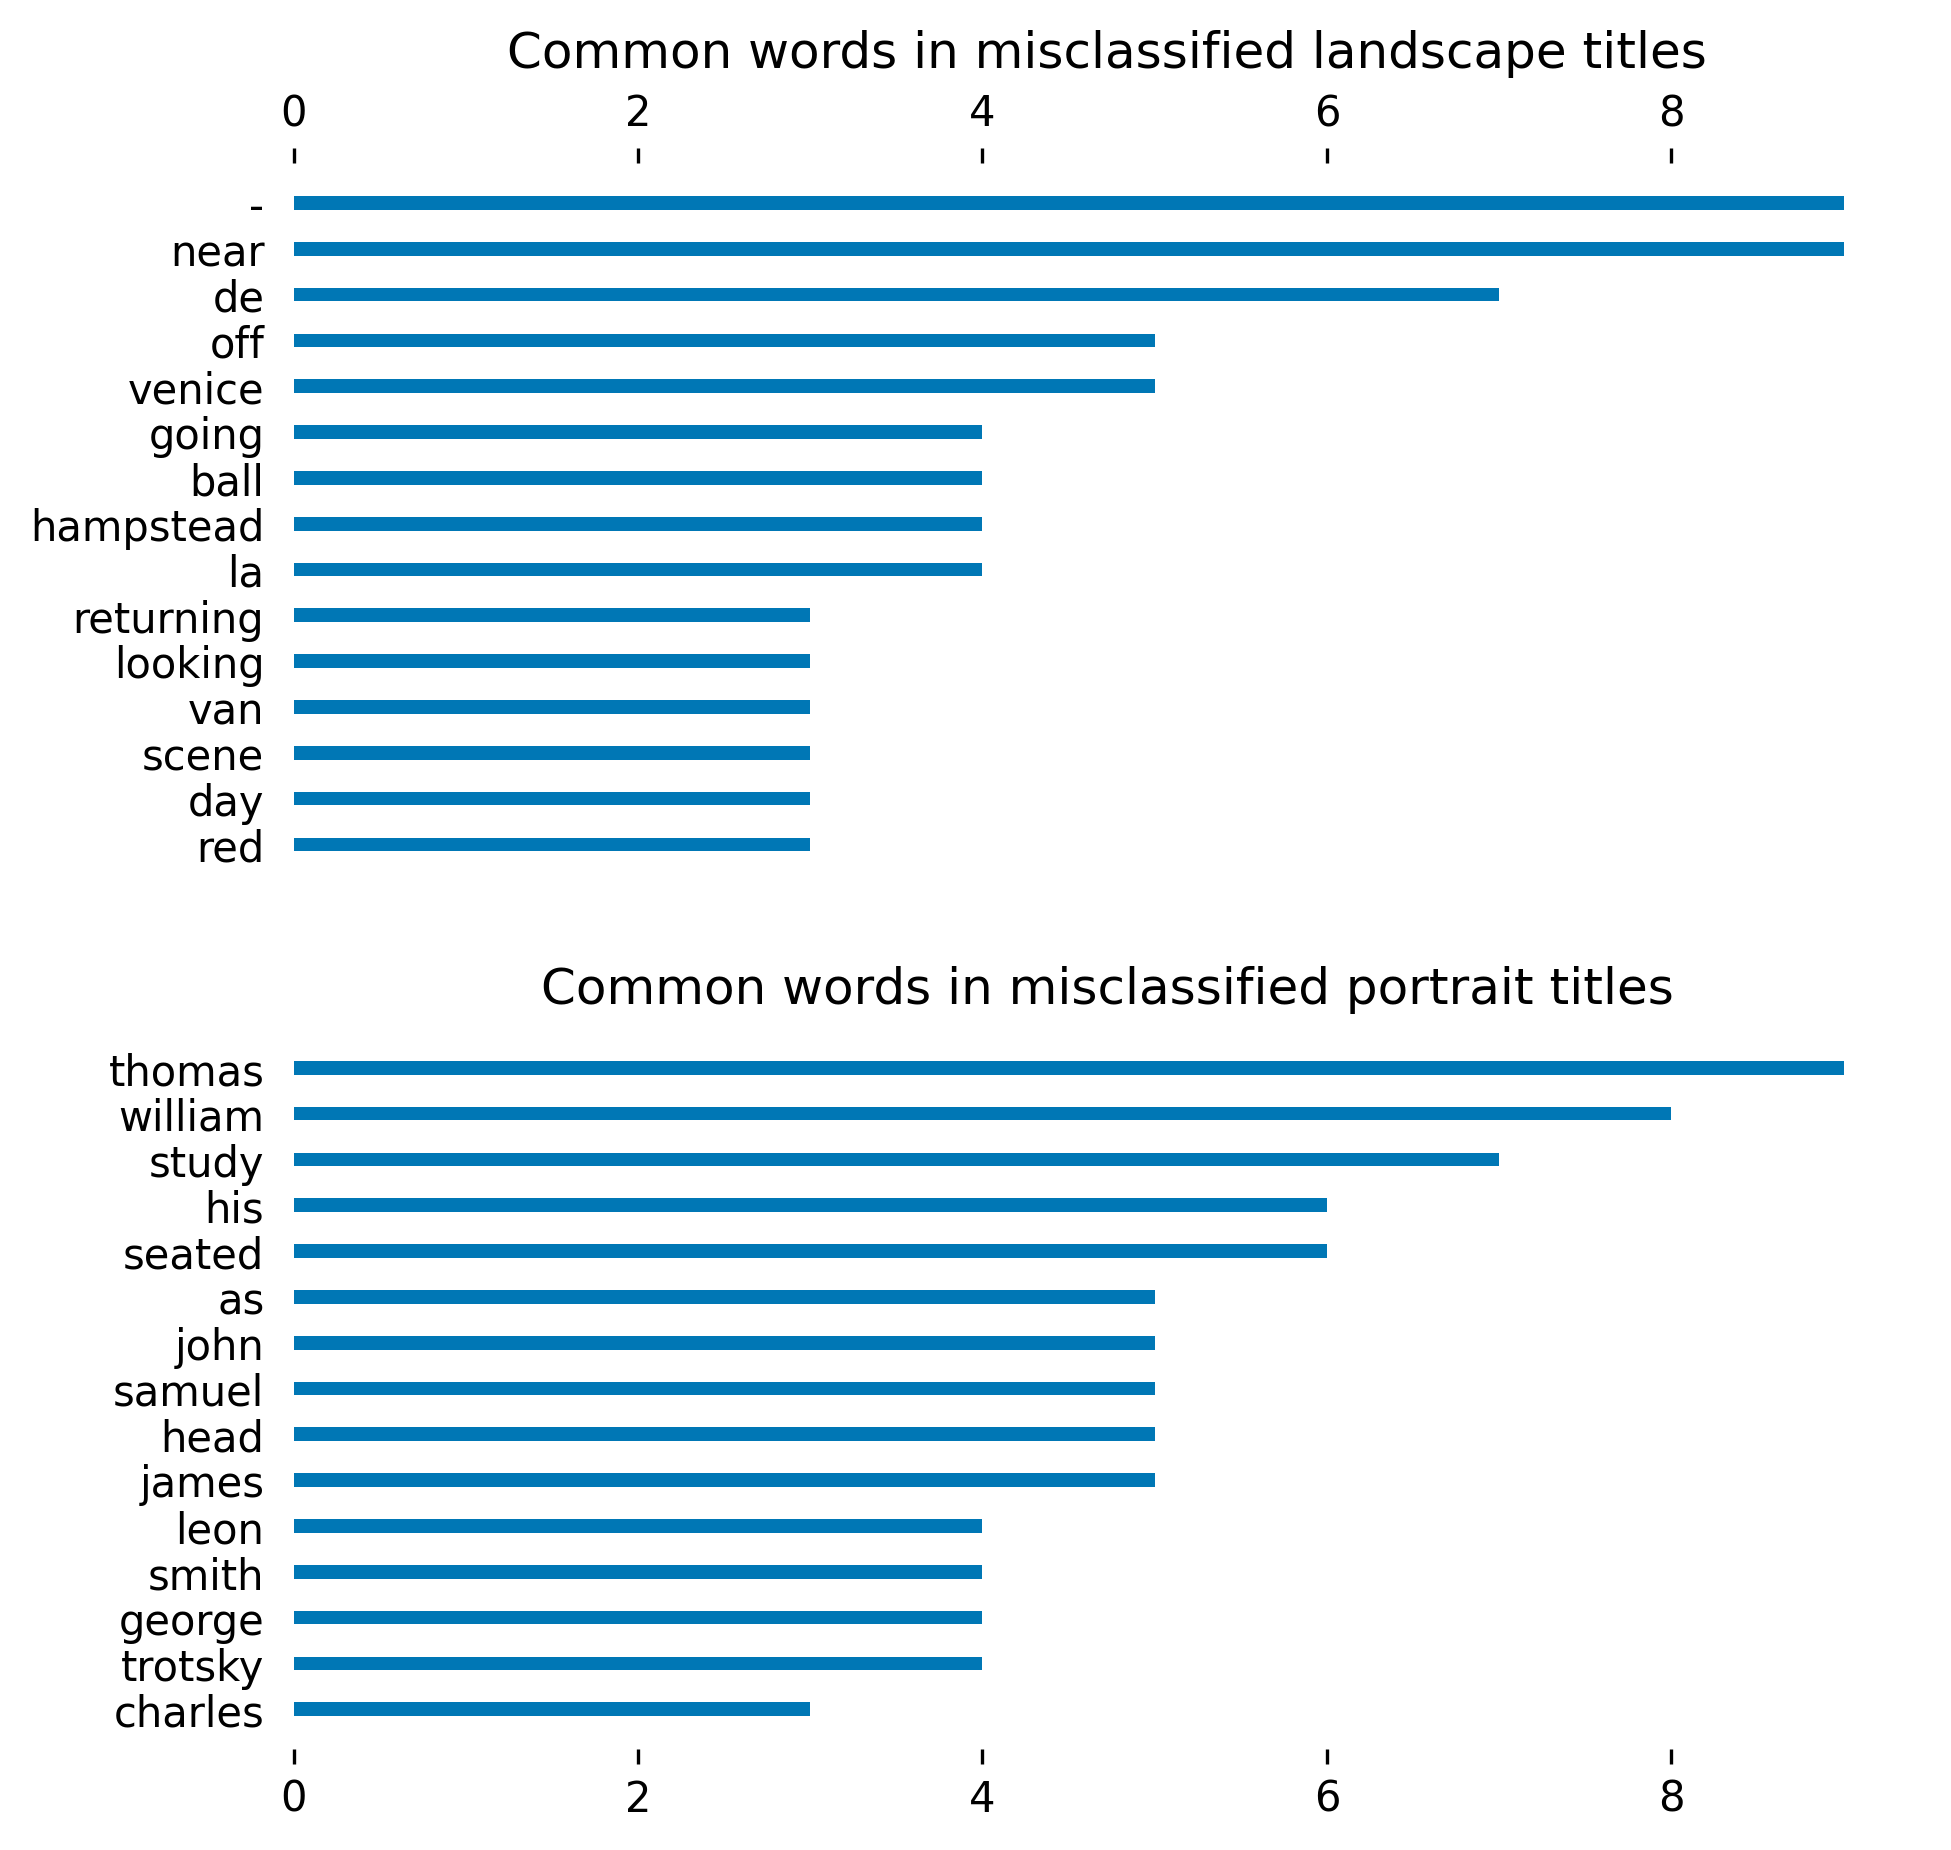

In [15]:
fland = (collection['title_model'] == 'O') & (collection['groundtruth'] == 'L')
fport = (collection['title_model'] == 'O') & (collection['groundtruth'] == 'P')

fig, axes = plt.subplots(2, 1, dpi=300, figsize=(7,7))
ax1, ax2 = axes

# Some chart options to make it look nice
for ax in axes:
    for s in ax.spines:
        ax.spines[s].set_visible(False)
    ax.tick_params(axis='y', which='both', left=False)
ax1.tick_params(axis='x', which='both', top=True, labeltop=True,
                bottom=False, labelbottom=False)

counts = collection[fland]['title'].str.split(expand=True).stack().value_counts()
counts = counts[~counts.index.isin(land_words|stop_words)][:15][::-1]
ax1.barh(counts.index, counts.values, height=.3)
ax1.set_title('Common words in misclassified landscape titles')

counts = collection[fport]['title'].str.split(expand=True).stack().value_counts()
counts = counts[~counts.index.isin(port_words|stop_words)][:15][::-1]
ax2.barh(counts.index, counts.values, height=.3)
ax2.set_title('Common words in misclassified portrait titles')

pass

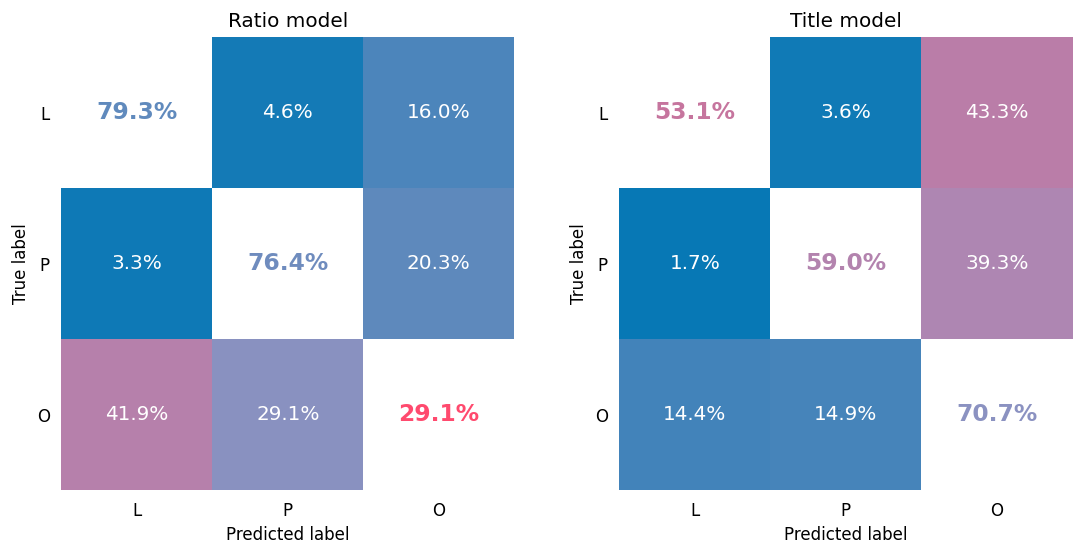

In [6]:
truth = collection['groundtruth']

fig, axes = plt.subplots(1, 2, figsize=(11,5), dpi=120)
for model, ax, bar in zip(['ratio_model', 'title_model'], axes, [False, True]):
    pred = collection[model]
        
    plot_confusion_matrix(truth, pred, 'LPO', ax)
    ax.set_title(model.replace("_", " ").capitalize())